In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
entrenamiento = pd.read_csv('train.csv')

In [58]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
entrenamiento.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

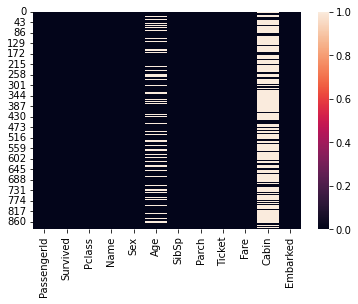

In [60]:
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

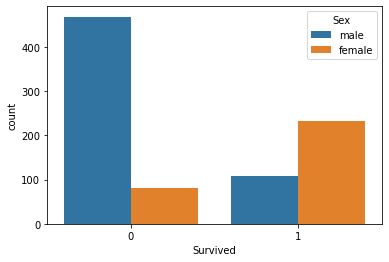

In [61]:
sns.countplot(x='Survived',data=entrenamiento,hue='Sex')

In [62]:
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

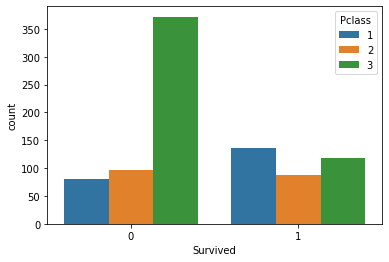

In [63]:
sns.countplot(x='Survived', data=entrenamiento,hue='Pclass')

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

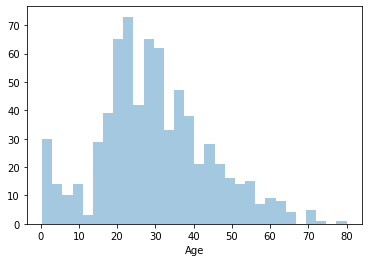

In [64]:
sns.distplot(entrenamiento['Age'].dropna(),kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

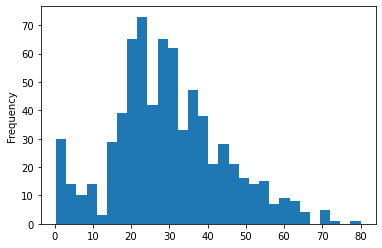

In [65]:
entrenamiento['Age'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

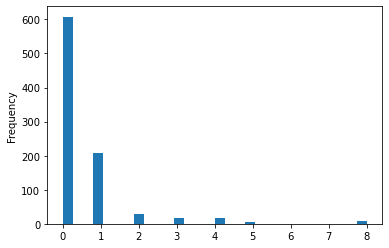

In [66]:
entrenamiento['SibSp'].plot.hist(bins=30)

In [67]:
import cufflinks as cf

In [68]:
cf.go_offline()

In [69]:
entrenamiento['Fare'].iplot(kind='hist', bins=40)

<AxesSubplot:>

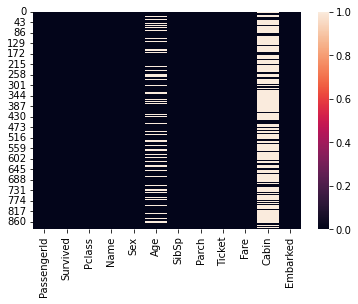

In [70]:
entrenamiento.isnull()
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

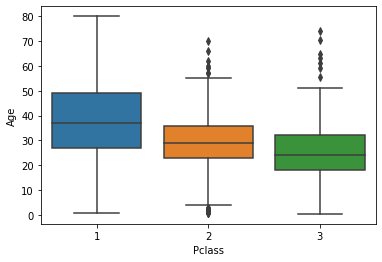

In [71]:
sns.boxplot(x='Pclass', y='Age', data=entrenamiento)

In [72]:
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25

In [73]:
entrenamiento['Age'] = entrenamiento[['Age','Pclass']].apply(edad_media, axis=1)

<AxesSubplot:>

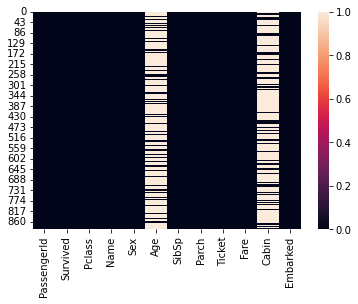

In [74]:
entrenamiento.isnull()
sns.heatmap(entrenamiento.isnull())

In [75]:
entrenamiento.drop('Cabin', axis=1,inplace=True)

<AxesSubplot:>

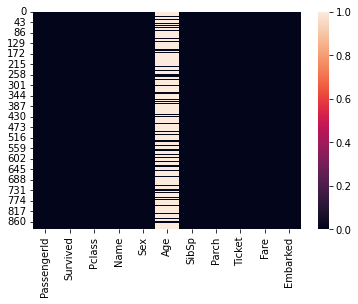

In [76]:
entrenamiento.isnull()
sns.heatmap(entrenamiento.isnull())

In [77]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,S


In [78]:
entrenamiento.drop(['Name','Ticket','PassengerId'], axis=1,inplace=True)

In [79]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,NaN,1,0,7.2500,S
1,1,1,female,NaN,1,0,71.2833,C
2,1,3,female,NaN,0,0,7.9250,S
3,1,1,female,NaN,1,0,53.1000,S
4,0,3,male,NaN,0,0,8.0500,S


In [80]:
sexo = pd.get_dummies(entrenamiento['Sex'],drop_first=True)

In [81]:
entrenamiento = pd.concat([entrenamiento,sexo], axis=1)

In [82]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,NaN,1,0,7.2500,S,1
1,1,1,female,NaN,1,0,71.2833,C,0
2,1,3,female,NaN,0,0,7.9250,S,0
3,1,1,female,NaN,1,0,53.1000,S,0
4,0,3,male,NaN,0,0,8.0500,S,1


In [83]:
entrenamiento.drop('Sex', axis=1,inplace=True)

In [84]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,NaN,1,0,7.2500,S,1
1,1,1,NaN,1,0,71.2833,C,0
2,1,3,NaN,0,0,7.9250,S,0
3,1,1,NaN,1,0,53.1000,S,0
4,0,3,NaN,0,0,8.0500,S,1


In [85]:
puerto = pd.get_dummies(entrenamiento['Embarked'],drop_first=True)

In [86]:
entrenamiento = pd.concat([entrenamiento,puerto], axis=1)

In [87]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,NaN,1,0,7.2500,S,1,0,1
1,1,1,NaN,1,0,71.2833,C,0,0,0
2,1,3,NaN,0,0,7.9250,S,0,0,1
3,1,1,NaN,1,0,53.1000,S,0,0,1
4,0,3,NaN,0,0,8.0500,S,1,0,1


In [88]:
y = entrenamiento['Survived']
x = entrenamiento.drop('Survived', axis=1)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=45)

In [90]:
from sklearn.linear_model import LogisticRegression

In [92]:
modelo = LogisticRegression()
modelo.fit(X_test, y_test)

ValueError: could not convert string to float: 'S'